In [1]:
import pandas as pd
import numpy as np

## 1.

In [2]:
progresses_df = pd.read_csv('./Data/progresses.csv')  #  (15934, 3)
progresses_df.rename(columns={'id' : 'progress_id'}, inplace=True)# переименовали
progresses_df.head(2)

,progress_id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f


In [3]:
progress_phases_df = pd.read_csv('./Data/progress_phases.csv')  #  (350677, 6)
progress_phases_df.head(2)

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00


In [4]:
main_df = progress_phases_df.merge(progresses_df, how='inner', on='progress_id') # объединим = (350677, 8)
main_df.head(2)

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b


In [5]:
courses_df = pd.read_csv('./Data/courses.csv', index_col=0)  #  (15, 3)
courses_df.rename(columns={'id' : 'course_id', 'title' : 'course_title', 'field' : 'course_field'}, inplace=True)
courses_df.head(2)

,course_id,course_title,course_field
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design


In [6]:
main_df = main_df.merge(courses_df, on='course_id') # объединим
print(main_df.shape)
main_df.head(2)

(350677, 10)


,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design


In [7]:
course_contents_df = pd.read_csv('./Data/course_contents.csv')  #  (1201, 8)
course_contents_df.head(2)  

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False


In [8]:
main_df = main_df.merge(course_contents_df, on=['course_id', 'module_number', 'lesson_number']) # объединим по нескольким полям
print(main_df.shape)
main_df.head(2)

(350677, 15)


,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False


In [9]:
main_df.to_csv('./Data/main.csv', index=False) # сохраним датасет

### общее количество курсов в датасете

In [10]:
main_df.course_title.nunique()

15

### количество модулей на каждом курсе

In [11]:
main_df.groupby('course_title').module_number.max().sort_values()

course_title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_number, dtype: int64

### количество уроков в каждом модуле на каждом курсе

In [12]:
main_df.groupby(['course_title', 'module_title']).lesson_number.max()

course_title                   module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

### медианное количество уроков в модуле на каждом курсе

In [13]:
main_df.groupby(['course_title', 'module_title']).lesson_title.nunique().groupby(level=0).median()

course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

### количество учеников на каждом курсе

In [14]:
main_df.groupby('course_title').student_id.nunique()

course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

### минимальный, максимальный, средний, медианный возраст студентов

In [15]:
students_df = pd.read_csv('./Data/students.csv')  #  (43830, 3) 
students_df = students_df.drop('id_', axis=1)
students_df.rename(columns={'id' : 'students_id'}, inplace=True)
students_df.head(3)    

,students_id,city,birthday
0,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,2033122d7c9b24b36eebc468d5259642,NaN,NaN


In [16]:
students_df.dropna(subset=['birthday'], inplace=True) # удалим NaN  birthday     25499 non-null  object

###  Вариант 1  - просто через цифры из строки

In [17]:
students_df['year'] = students_df['birthday'].str[:4].astype(int) # выбрали только год рождения и преобразовали к целому
students_df.head(2)  

,students_id,city,birthday,year
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,1979
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,1991


In [18]:
students_df['age'] = 2021 - students_df['year']  # вычислили возраст, но приблизительно
students_df.head(2)  

,students_id,city,birthday,year,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,1979,42
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,1991,30


In [19]:
students_df = students_df[(students_df['age'] >= 18) & (students_df['age'] <= 65)]

In [20]:
students_df.age.agg(['min', 'max', 'mean', 'median'])

min       18.000000
max       65.000000
mean      30.844202
median    30.000000
Name: age, dtype: float64

### Вариант 2  - через datetime()

In [21]:
students_df = pd.read_csv('./Data/students.csv')  #  (43830, 3)  
students_df = students_df.drop('id_', axis=1)
students_df.rename(columns={'id' : 'student_id'}, inplace=True)
students_df.dropna(subset=['birthday'], inplace=True) # удалим NaN 
students_df.head(2)   

,student_id,city,birthday
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15


In [22]:
students_df['birthday'] = pd.to_datetime(students_df['birthday'], errors='coerce' ) 

# подавление ошибок надо, иначе - OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 235-05-31 00:00:00
# но  student_id  25499 non-null  object, а  birthday    25490 non-null  datetime64[ns]

In [23]:
students_df.dropna(subset=['birthday'], inplace=True)

In [24]:
from datetime import datetime, timedelta

In [25]:
now = datetime.now() # возьмем сегодняшнюю дату

In [26]:
students_df['age'] = round((now - students_df['birthday']) / timedelta(365)).astype(int) # год = 365 дней приблизительно
students_df.head(2)

,student_id,city,birthday,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,43
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,32


In [27]:
students_df = students_df[(students_df['age'] >= 18) & (students_df['age'] <= 65)]

In [28]:
students_df.age.agg(['min', 'max', 'mean', 'median'])

min       18.000000
max       65.000000
mean      32.465081
median    32.000000
Name: age, dtype: float64

### Вариант 3  - через pd.date_range()

In [29]:
students_df = pd.read_csv('./Data/students.csv')  #  (43830, 3)  
students_df = students_df.drop('id_', axis=1)
students_df.rename(columns={'id' : 'student_id'}, inplace=True)
students_df.dropna(subset=['birthday'], inplace=True) # удалим NaN 
students_df.head(2)   

,student_id,city,birthday
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15


In [31]:
students_df['birthday'] = pd.to_datetime(students_df['birthday'], errors='coerce' ) 
students_df.dropna(subset=['birthday'], inplace=True)

In [32]:
students_df['age'] = \
    students_df.apply(lambda x: len(pd.date_range(start = x['birthday'] , end= now, freq="Y")), axis=1)

# количество периодов размером 1 год от старта == лет на сегодняшний момент

In [33]:
students_df.head(2)

,student_id,city,birthday,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,44
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,32


In [34]:
students_df = students_df[(students_df['age'] >= 18) & (students_df['age'] <= 65)] 

In [35]:
students_df.age.agg(['min', 'max', 'mean', 'median'])

min       18.000000
max       65.000000
mean      32.664202
median    32.000000
Name: age, dtype: float64

### минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [36]:
students_df.head(2)

,student_id,city,birthday,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,44
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,32


In [37]:
courses_df.head(2)

,course_id,course_title,course_field
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design


In [38]:
progresses_df.head(2) 

,progress_id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f


In [39]:
age_df = courses_df[['course_id', 'course_title']].merge(progresses_df, on='course_id', how='inner') # объединим
age_df.head(2)

,course_id,course_title,progress_id,student_id
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791


In [40]:
age_df = age_df.merge(students_df, on='student_id') # (14130, 7) именно how='inner', иначе будут студенты без возраста и ДР
age_df.head(2)

,course_id,course_title,progress_id,student_id,city,birthday,age
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,Москва,1997-07-24,26
1,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,aab2812adb6f8636341b11b693c44a22,0b4656b84ca60350583f8fbe236dda86,Москва,1997-07-24,26


In [41]:
age_df.groupby('course_title').age.agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
course_title,,,,
Excel Базовый,20,64,37.241742,37.0
Java-разработчик,18,58,32.837956,32.0
Java-разработчик c нуля,18,58,33.164076,32.0
JavaScript с нуля,18,63,32.230011,31.0
PHP-разработчик с 0 до PRO. Часть 1,18,63,33.042394,32.0
SMM-маркетолог от А до Я,21,55,32.621730,32.0
UX-дизайн,18,61,33.757028,33.0
Анимация интерфейсов,18,54,33.227188,33.0
Веб-вёрстка для начинающих 2.0,18,63,32.254879,31.0


In [42]:
age_df.to_csv('./Data/age.csv', index=False) # сохраним датасет

In [43]:
import matplotlib.pyplot as plt

### Bar-chart, отражающий количество студентов на каждом курсе.

In [44]:
qaqa = main_df.groupby('course_title').student_id.nunique().sort_values()
qaqa.head(3)

course_title
SMM-маркетолог от А до Я    506
Веб-дизайн Базовый          518
Java-разработчик c нуля     581
Name: student_id, dtype: int64

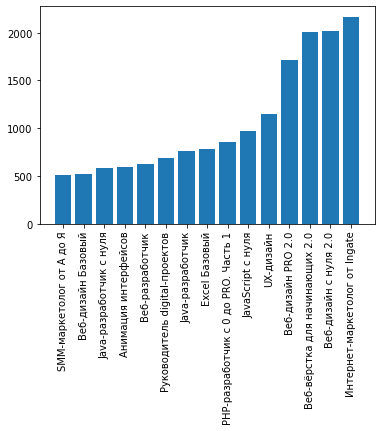

In [45]:
plt.bar(qaqa.index, qaqa.values)
plt.xticks(rotation=90)
plt.show()

In [46]:
bar_df = main_df.groupby('course_title').student_id.nunique().sort_values(ascending=False).reset_index()
bar_df.rename(columns={'student_id' : 'student_number'}, inplace=True)
bar_df.head(3)

,course_title,student_number
0,Интернет-маркетолог от Ingate,2168
1,Веб-дизайн с нуля 2.0,2014
2,Веб-вёрстка для начинающих 2.0,2004


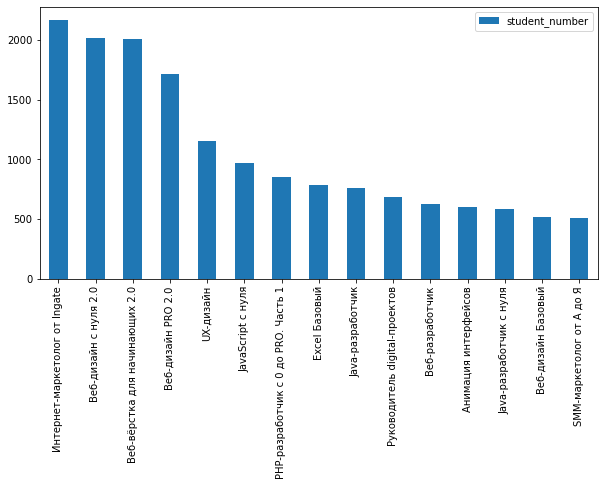

In [47]:
plot = bar_df.plot.bar(x='course_title', y='student_number', figsize=(10,5))
plot.set(xlabel=None)
plt.show()

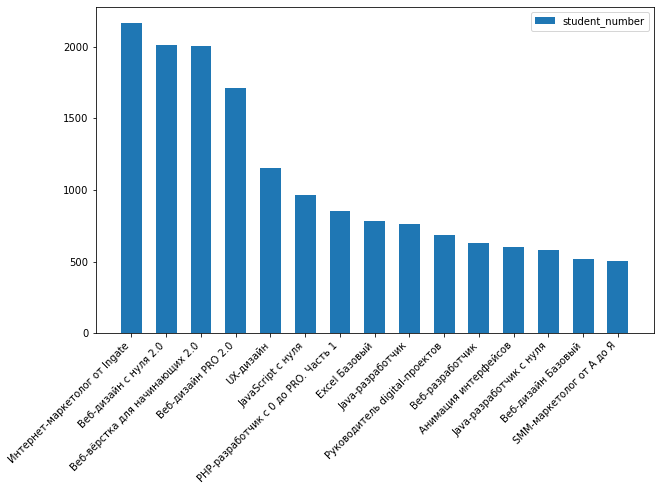

In [48]:
plt.figure(figsize=(10,6))
plt.bar(bar_df.course_title, bar_df.student_number, width=0.6, label='student_number')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend()

plt.show()

### Горизонтальный Bar-chart, отражающий количество студентов на каждом курсе. 

In [49]:
median_value = int(bar_df.student_number.median())
median_value

782

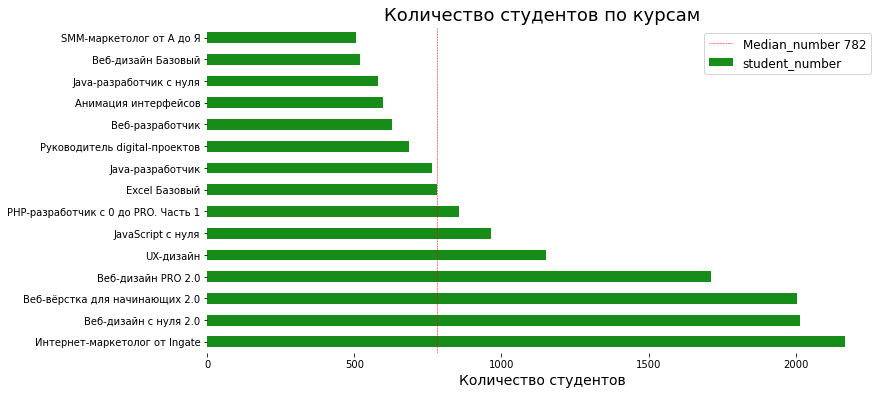

In [50]:
plot = bar_df.plot.barh(x='course_title', y='student_number', color='green', figsize=(12,6), alpha=0.9)
plt.xlabel("Количество студентов", fontsize=14)
plt.title("Количество студентов по курсам", fontsize=18)
plt.axvline(x=median_value, ls='--', color='r', label=f"Median_number {median_value}", linewidth=0.5)
plot.legend(loc=1, fontsize=12)
plot.set(ylabel=None)
plot.set_frame_on(False) # рамка
plt.show()

In [51]:
field_df = main_df.groupby(['course_field', 'course_title']).student_id.nunique().sort_values(ascending=False).reset_index()
field_df.rename(columns={'student_id' : 'student_number'}, inplace=True)
field_df.head(3)

,course_field,course_title,student_number
0,Marketing,Интернет-маркетолог от Ingate,2168
1,Design,Веб-дизайн с нуля 2.0,2014
2,Development,Веб-вёрстка для начинающих 2.0,2004


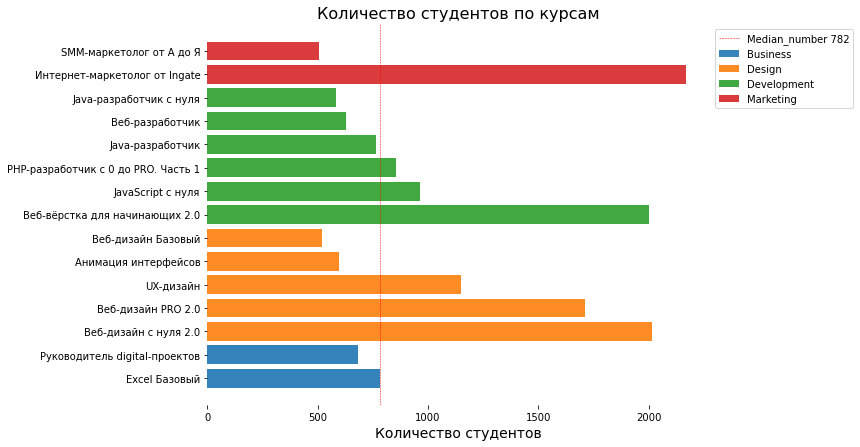

In [52]:
fig, ax1 = plt.subplots(figsize=(9, 7)) 

for name, group in field_df.groupby(['course_field']): 
    ax1.barh(group.course_title, group.student_number, label=name, alpha=0.9)

ax1.set_title("Количество студентов по курсам", fontsize=16)
ax1.set_xlabel("Количество студентов", fontsize=14)
ax1.axvline(median_value, ls='--', color='r', label=f"Median_number {median_value}", linewidth=0.5)
ax1.set_frame_on(False) # рамка
ax1.legend(bbox_to_anchor=(1,1)) # расположение легенды

plt.show()

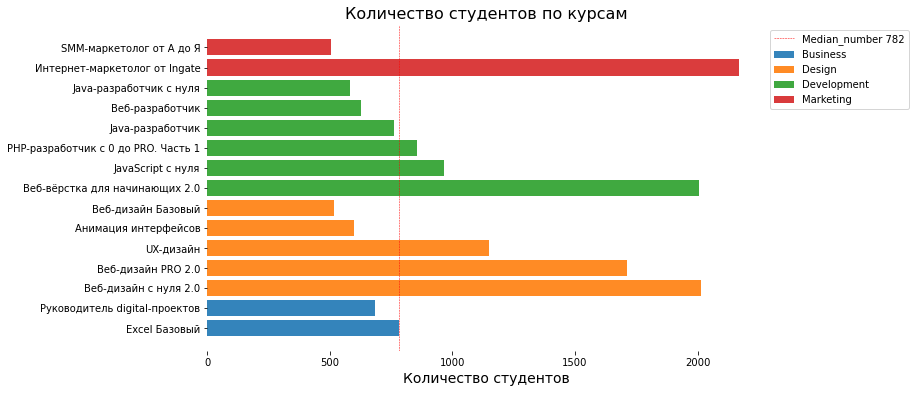

In [53]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(frameon=False) # рамка № 1
for name, group in field_df.groupby(['course_field']):    
    plt.barh(group.course_title, group.student_number, label=name, alpha=0.9)

plt.title("Количество студентов по курсам", fontsize=16)
plt.xlabel("Количество студентов", fontsize=14)
plt.axvline(median_value, ls='--', color='r', label=f"Median_number {median_value}", linewidth=0.5)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [54]:
import matplotlib

In [55]:
field_list = field_df['course_field'].unique().tolist()
field_list

['Marketing', 'Design', 'Development', 'Business']

In [56]:
colors = matplotlib.colors.get_named_colors_mapping()
color_map = {                                  # задаем вручную                        
    'Marketing': colors['xkcd:cloudy blue'],   # доступ к значению по ключу массива цветов
    'Design': colors['xkcd:azul'], 
    'Development': colors['xkcd:electric lime'], 
    'Business': colors['xkcd:fresh green']
}

In [57]:
# или так 
l = list(colors.values())[:4]
color_map = {j:l[i] for i, j in enumerate(field_list)}
color_map           

{'Marketing': '#acc2d9',
 'Design': '#56ae57',
 'Development': '#b2996e',
 'Business': '#a8ff04'}

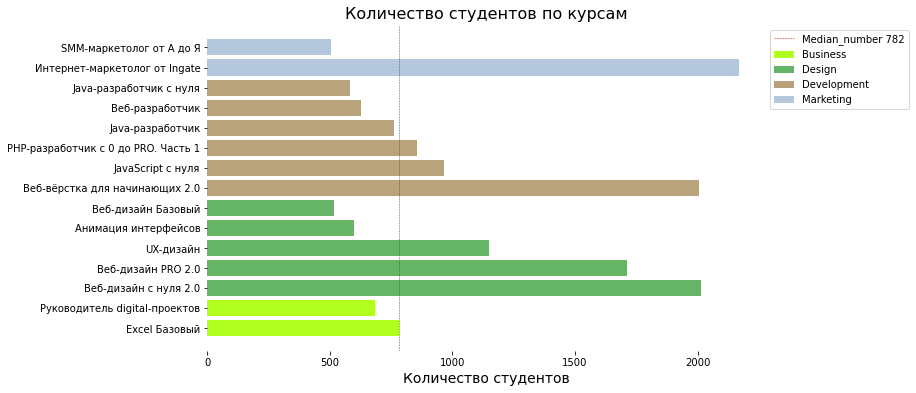

In [58]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(frameon=False)  # рамка № 2
for name, group in field_df.groupby(['course_field']):    
    plt.barh(group.course_title, group.student_number, label=name, alpha=0.9, color=color_map[name])

plt.title("Количество студентов по курсам", fontsize=16)
plt.xlabel("Количество студентов", fontsize=14)
plt.axvline(median_value, ls='--', color='r', label=f"Median_number {median_value}", linewidth=0.5)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

###  Итог

- Студенты имеют возможность пройти обучение на 15 курсах.

- Количество модулей на каждом курсе различается в зависимости от направления и колеблется от 8 до 21, в среднем примерно 15.

- Медианное количество уроков в каждом модуле на курсе 5.

- Количество учеников на курсах колеблется от 500 до 2000, среднее значение примерно 1000.

- Средний возраст студентов 31 год

- На курс Руководитель digital-проектов поступают более взрослые, наиболее возрастные студенты обучаются на курсах Руководитель digital-проектов и Excel Базовый, наибольший средний возраст на Excel Базовый - 35, наименьший на курсе Веб-разработчик - чуть менее 30, самые молодые студенты на обучаются на напралениях, связанных с Веб. 